# [Anything From Scratch] Linear Regression with Gradient Descent

Source: [misraturp](https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch/tree/main/02%20Linear%20Regression)

I'll update knowledge soon.


## From Scratch with numpy

In [ ]:
# import some importation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
# building class Linear Regression
class LinearRegression:
    # Assign some variable
    # lr : learning rate
    # n_iters : number of training epochs
    def __init__(self, lr = 0.001, n_iters= 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None # Assign weights
        self.bias = None # bias you can know as w0

    # fit function
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) # Weights start with 0
        self.bias = 0 # Start bias in 0

        for _ in range(self.n_iters):
            # Get y predict
            y_pred = np.dot(X, self.weights) + self.bias

            # Get deviation of weights and bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update new weights and bias
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        # Prediction y with new input to test
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred


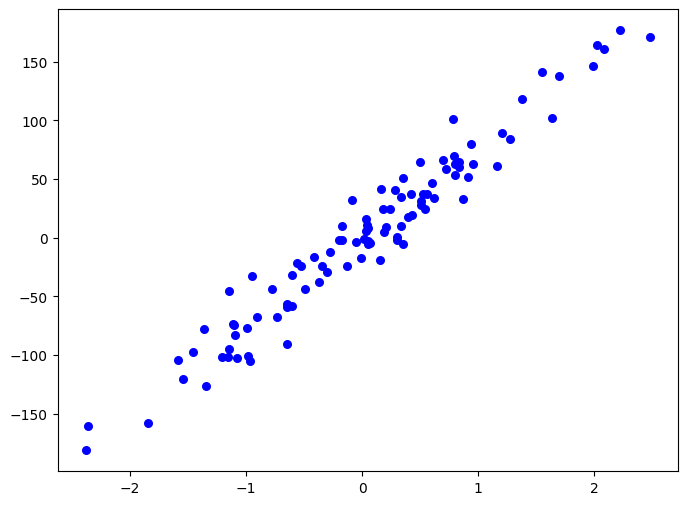

In [ ]:
# Test model
# Build dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise = 20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Show
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

In [ ]:
# built
reg = LinearRegression(lr=0.01)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [ ]:
# MSE
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

In [ ]:
# Get loss
mse = mse(y_test, predictions)
print(mse)

305.7719958301902


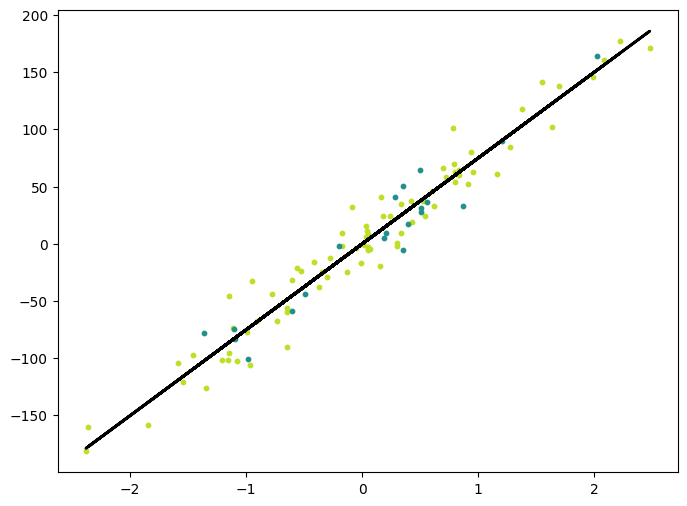

In [ ]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

## Using SKlearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.9247515208302274
The rmse is:  17.486398474896546
